
# Quantile Regression

## What is Quantile Regression?

In standard regression, the model predicts the average (mean) value of the target given the input.
However, sometimes the mean is not enough — we may want to know how the data is distributed.
- Quantile Regression allows us to estimate different quantiles (or percentiles) of the target distribution.
    - q = 0.5 → Median regression (the 50th percentile line)
    - q = 0.1 → Lower bound (10th percentile)
    - q = 0.9 → Upper bound (90th percentile)

## Pinball (Quantile) Loss

Quantile regression uses a special loss function called pinball loss (or quantile loss).

The formule is: 
    - Lq​(y,y^​)=max(q⋅(y−y^​),(q−1)⋅(y−y^​))
- If the prediction is too low, underestimation is penalized by q.
- If the prediction is too high, overestimation is penalized by 1 - q.

This forces the model to learn the target quantile. 

In [3]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt 
import numpy as np 

np.random.seed(42)
X = np.random.uniform(0,10,200)
y = 2 * X + np.random.normal(0, 2, size=X.shape)

X_tesnor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [4]:
class QuanticLoss(nn.Module): 
    def __init__(self, quantile): 
        super(QuanticLoss, self).__init__()
        self.quantile = quantile 

    def forward(self, preds, target): 
        errors = target - preds
        loss = torch.max(self.quantile * errors, (self.quantile - 1 * errors))
        return torch.mean(loss)
    
class QuantileRegressionModel(nn.Module): 
    def __init__(self): 
        super(QuantileRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x): 
        return self.linear(x)

Finished training for quantile=0.1
Finished training for quantile=0.5
Finished training for quantile=0.9


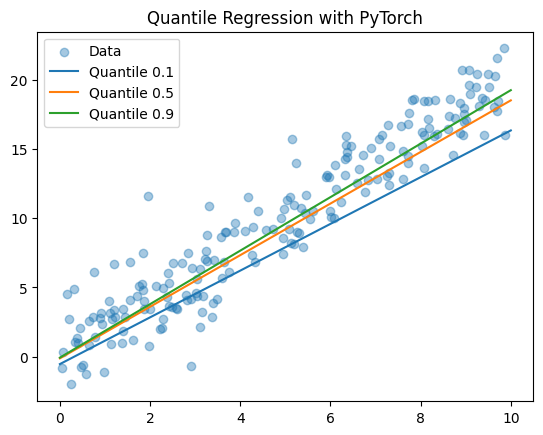

In [5]:
quantiles = [0.1, 0.5, 0.9]
models = {}

for q in quantiles:
    model = QuantileRegressionModel()
    criterion = QuanticLoss(q)
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = model(X_tesnor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

    models[q] = model
    print(f"Finished training for quantile={q}")

X_test = np.linspace(0, 10, 100)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)

plt.scatter(X, y, alpha=0.4, label="Data")

for q, model in models.items():
    y_pred = model(X_test_tensor).detach().numpy()
    plt.plot(X_test, y_pred, label=f"Quantile {q}")

plt.legend()
plt.title("Quantile Regression with PyTorch")
plt.show()